# [Assignment 3](https://ovgu-ailab.github.io/idl2023/assignment3.html)

**_Colaborative Work from Adrian Bremer and Philipp Reinig_**

## Setup

In [1]:
import tensorflow as tf
import keras
from keras import layers
import numpy as np
import matplotlib.pyplot as plt


2023-11-02 12:02:47.594591: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-02 12:02:47.729269: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-02 12:02:47.729322: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-02 12:02:47.729806: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-02 12:02:47.794918: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-02 12:02:47.796489: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

## CNN for MNIST
### Prepare data

In [16]:
(train_imgs, train_lbls), (test_imgs, test_lbls) = keras.datasets.mnist.load_data()

train_data = tf.data.Dataset.from_tensor_slices(
    (train_imgs.reshape((-1,28,28,1)).astype(np.float32) / 255, train_lbls.astype(np.int32))).shuffle(buffer_size=60000).batch(128).repeat()

test_data = tf.data.Dataset.from_tensor_slices(
    (test_imgs.reshape((-1,28,28,1)).astype(np.float32) / 255, test_lbls.astype(np.int32))).batch(128)


### Build CNN model with Keras

In [31]:
#keras.Input
#layers.Conv2D
#layers.GlobalMaxPool[ing]2D
#layers.MaxPool[ing]2D
#layers.Flatten
#layers.Dense
#keras.Model

model = keras.Sequential([
    layers.Conv2D(filters=16, kernel_size=5, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=32, kernel_size=5, padding="valid", activation="relu"),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(units=128, activation="relu"),
    layers.Dense(units=10)
], name="simple_conv")

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [27]:
model.fit(train_data, epochs=10, steps_per_epoch=50)

Epoch 1/10
50/50 [==============================] - 2s 29ms/step - loss: 0.9006 - accuracy: 0.7511
Epoch 2/10
50/50 [==============================] - 1s 22ms/step - loss: 0.2849 - accuracy: 0.9181
Epoch 3/10
50/50 [==============================] - 1s 20ms/step - loss: 0.1960 - accuracy: 0.9423
Epoch 4/10
50/50 [==============================] - 1s 21ms/step - loss: 0.1615 - accuracy: 0.9534
Epoch 5/10
50/50 [==============================] - 1s 21ms/step - loss: 0.1194 - accuracy: 0.9623
Epoch 6/10
50/50 [==============================] - 1s 21ms/step - loss: 0.1137 - accuracy: 0.9630
Epoch 7/10
50/50 [==============================] - 1s 21ms/step - loss: 0.0856 - accuracy: 0.9745
Epoch 8/10
50/50 [==============================] - 1s 21ms/step - loss: 0.0864 - accuracy: 0.9750
Epoch 9/10
50/50 [==============================] - 1s 21ms/step - loss: 0.0754 - accuracy: 0.9803
Epoch 10/10
50/50 [==============================] - 1s 22ms/step - loss: 0.0730 - accuracy: 0.9785


In [28]:
model.summary()

Model: "simple_conv"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 16)        416       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 14, 14, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 10, 10, 32)        12832     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 5, 5, 32)          0         
 ng2D)                                                           
                                                                 
 flatten_6 (Flatten)         (None, 800)               0         
                                                                 
 dense_12 (Dense)            (None, 128)               

In [29]:
model.evaluate(test_data)

79/79 [==============================] - 1s 7ms/step - loss: 0.0519 - accuracy: 0.9836


[0.051912419497966766, 0.9836000204086304]

In [30]:
model.metrics_names

['loss', 'accuracy']

## CNN on fashion mnist

### Reusing old model / only changing the datasets

In [15]:
(train_imgs, train_lbls), (test_imgs, test_lbls) = keras.datasets.fashion_mnist.load_data()

train_data = tf.data.Dataset.from_tensor_slices(
    (train_imgs.reshape((-1,28,28,1)).astype(np.float32) / 255, train_lbls.astype(np.int32))).shuffle(buffer_size=60000).batch(128).repeat()

test_data = tf.data.Dataset.from_tensor_slices(
    (test_imgs.reshape((-1,28,28,1)).astype(np.float32) / 255, test_lbls.astype(np.int32))).batch(128)


In [33]:
# run the cell where the previous model is defined and compiled
# then run this cell to train on fashion mnist
model.fit(train_data, epochs=10, steps_per_epoch=50)

Epoch 1/10
50/50 [==============================] - 2s 21ms/step - loss: 1.1508 - accuracy: 0.5841
Epoch 2/10
50/50 [==============================] - 1s 21ms/step - loss: 0.7096 - accuracy: 0.7347
Epoch 3/10
50/50 [==============================] - 1s 21ms/step - loss: 0.6171 - accuracy: 0.7750
Epoch 4/10
50/50 [==============================] - 1s 21ms/step - loss: 0.5352 - accuracy: 0.8069
Epoch 5/10
50/50 [==============================] - 1s 22ms/step - loss: 0.4949 - accuracy: 0.8211
Epoch 6/10
50/50 [==============================] - 1s 22ms/step - loss: 0.4639 - accuracy: 0.8328
Epoch 7/10
50/50 [==============================] - 1s 22ms/step - loss: 0.4514 - accuracy: 0.8422
Epoch 8/10
50/50 [==============================] - 1s 21ms/step - loss: 0.4552 - accuracy: 0.8308
Epoch 9/10
50/50 [==============================] - 1s 21ms/step - loss: 0.4191 - accuracy: 0.8500
Epoch 10/10
50/50 [==============================] - 1s 22ms/step - loss: 0.4133 - accuracy: 0.8527


In [34]:
model.evaluate(test_data)

79/79 [==============================] - 1s 8ms/step - loss: 0.4295 - accuracy: 0.8469


[0.42950576543807983, 0.8468999862670898]

**Conclusions**:
The same model with only 2 convolutional layers and one dense layer performs quite well on fashion mnist. It reaches an accuracy of around 85%.

### Trying different hyperparameters
#### Bigger kernels 

79/79 [==============================] - 10s 126ms/step - loss: 0.3841 - accuracy: 0.8595


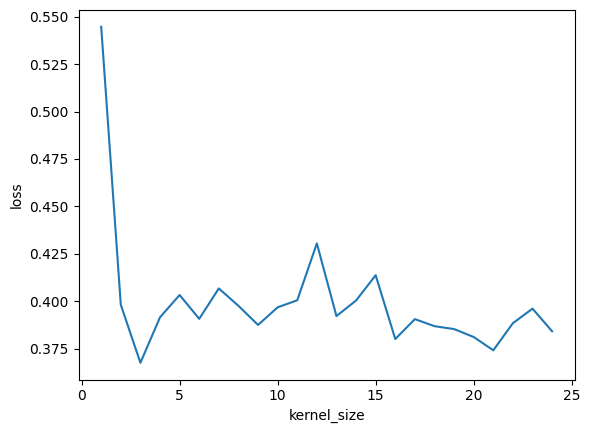

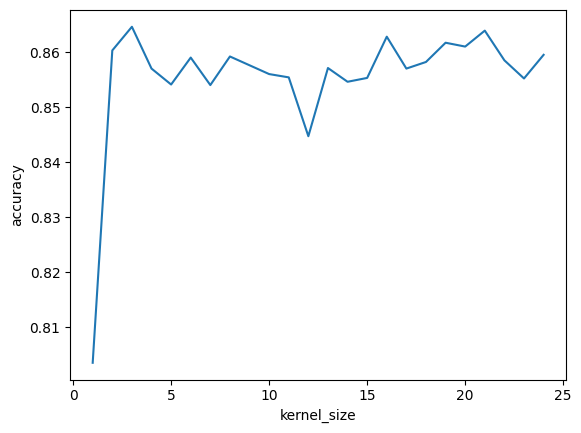

In [8]:
losses = []
accs = []
kernel_sizes = range(1,25,1)

for ks in kernel_sizes:
    model = keras.Sequential([
        layers.Conv2D(filters=16, kernel_size=ks, padding="same", activation="relu"),
        layers.MaxPooling2D(),
        layers.Conv2D(filters=32, kernel_size=ks, padding="same", activation="relu"),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(units=128, activation="relu"),
        layers.Dense(units=10)
    ], name="simple_conv")

    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    
    model.fit(train_data, epochs=10, steps_per_epoch=50, verbose=0)
    loss, acc = model.evaluate(test_data)
    losses.append(loss)
    accs.append(acc)
    
plt.plot(kernel_sizes, losses)
plt.xlabel('kernel_size')
plt.ylabel('loss')
plt.show()
    
plt.plot(kernel_sizes, accs)
plt.xlabel('kernel_size')
plt.ylabel('accuracy')
plt.show()

- kernel_sizes seem to have no influence on accuracy 
- even if really big kernels should work badly because they sum up the whole pixel values at some point

#### Different number of channels

79/79 [==============================] - 2s 22ms/step - loss: 0.3356 - accuracy: 0.8810


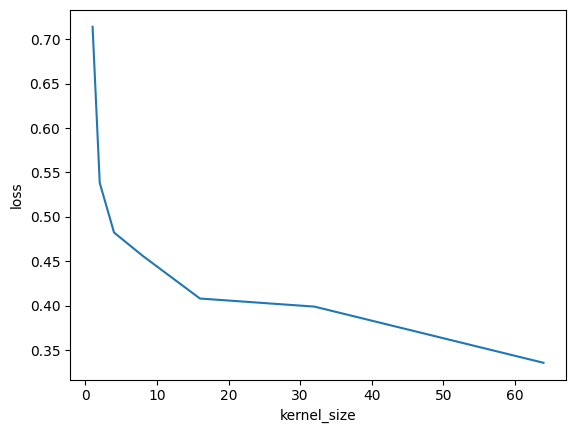

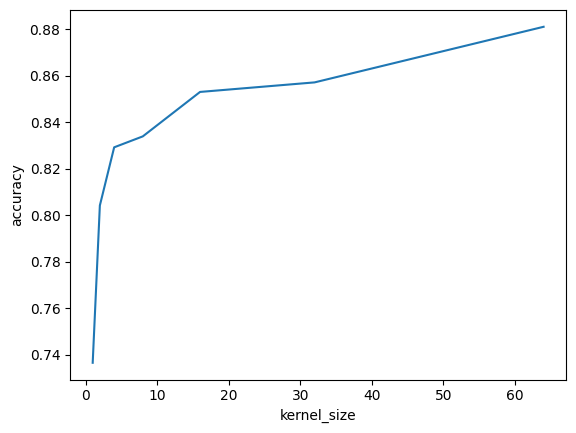

In [10]:
losses = []
accs = []
channels = [1,2,4,8,16,32,64]

for channel in channels:
    model = keras.Sequential([
        layers.Conv2D(filters=channel, kernel_size=5, padding="same", activation="relu"),
        layers.MaxPooling2D(),
        layers.Conv2D(filters=2*channel, kernel_size=5, padding="valid", activation="relu"),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(units=128, activation="relu"),
        layers.Dense(units=10)
    ], name="simple_conv")

    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    
    model.fit(train_data, epochs=10, steps_per_epoch=50, verbose=0)
    loss, acc = model.evaluate(test_data)
    losses.append(loss)
    accs.append(acc)
    
plt.plot(channels, losses)
plt.xlabel('kernel_size')
plt.ylabel('loss')
plt.show()
    
plt.plot(channels, accs)
plt.xlabel('kernel_size')
plt.ylabel('accuracy')
plt.show()

- more channels, more accurate

#### More Convolutional Layers

79/79 [==============================] - 1s 9ms/step - loss: 0.6959 - accuracy: 0.7387


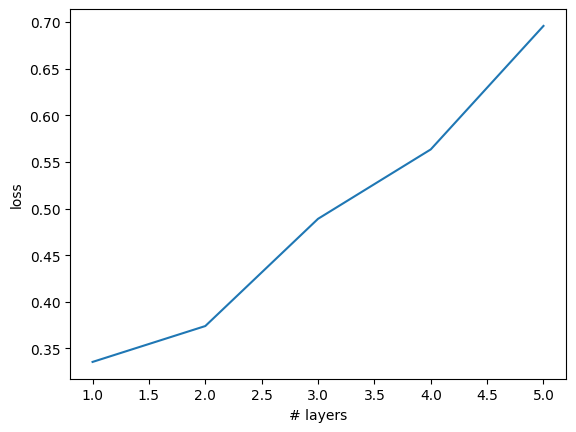

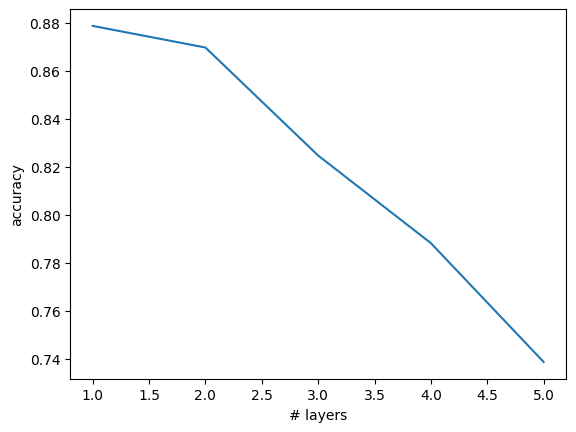

In [12]:
losses = []
accs = []
n_conv_layers = range(1,6)

for n in n_conv_layers:
    ls = []

    for i in range(n,0,-1):
        ls.append(layers.Conv2D(filters=64**(1/i), kernel_size=5, padding="same", activation="relu"))
        ls.append(layers.MaxPooling2D(padding="same"))
        
    ls.append(layers.Flatten())
    ls.append(layers.Dense(units=128, activation="relu"))
    ls.append(layers.Dense(units=10))
    
    model = keras.Sequential(ls, "more_layers_"+str(n))

    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    
    model.fit(train_data, epochs=10, steps_per_epoch=50, verbose=0)
    loss, acc = model.evaluate(test_data)
    losses.append(loss)
    accs.append(acc)
    
plt.plot(n_conv_layers, losses)
plt.xlabel('# layers')
plt.ylabel('loss')
plt.show()
    
plt.plot(n_conv_layers, accs)
plt.xlabel('# layers')
plt.ylabel('accuracy')
plt.show()

- worse accuracy with more layers
- probably because I decreased the channels

#### Final model using the knowledge from the experiments

In [23]:
model = keras.Sequential([
    layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=64, kernel_size=5, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=128, kernel_size=7, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(units=256, activation="relu"),
    layers.Dense(units=10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(train_data, epochs=10, steps_per_epoch=50)
model.evaluate(test_data)

Epoch 1/10
50/50 [==============================] - 7s 124ms/step - loss: 0.9656 - accuracy: 0.6431
Epoch 2/10
50/50 [==============================] - 6s 123ms/step - loss: 0.5551 - accuracy: 0.7948
Epoch 3/10
50/50 [==============================] - 6s 122ms/step - loss: 0.4747 - accuracy: 0.8244
Epoch 4/10
50/50 [==============================] - 6s 124ms/step - loss: 0.4231 - accuracy: 0.8477
Epoch 5/10
50/50 [==============================] - 6s 122ms/step - loss: 0.4042 - accuracy: 0.8480
Epoch 6/10
50/50 [==============================] - 6s 125ms/step - loss: 0.3647 - accuracy: 0.8683
Epoch 7/10
50/50 [==============================] - 6s 122ms/step - loss: 0.3401 - accuracy: 0.8763
Epoch 8/10
50/50 [==============================] - 6s 122ms/step - loss: 0.3291 - accuracy: 0.8802
Epoch 9/10
50/50 [==============================] - 6s 122ms/step - loss: 0.3055 - accuracy: 0.8852
Epoch 10/10
79/79 [==============================] - 2s 25ms/step - loss: 0.3238 - accuracy: 0.8856


[0.32381588220596313, 0.8855999708175659]

## CNN on CIFAR10
### Trying it with the previous model

In [2]:
(train_imgs, train_lbls), (test_imgs, test_lbls) = keras.datasets.cifar10.load_data()

train_data = tf.data.Dataset.from_tensor_slices(
    (train_imgs.reshape((-1,32,32,3)).astype(np.float32) / 255, train_lbls.reshape((-1,)).astype(np.int32))).shuffle(buffer_size=60000).batch(128).repeat()

test_data = tf.data.Dataset.from_tensor_slices(
    (test_imgs.reshape((-1,32,32,3)).astype(np.float32) / 255, test_lbls.reshape((-1,)).astype(np.int32))).batch(128)


In [28]:
model = keras.Sequential([
    layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=64, kernel_size=5, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=128, kernel_size=7, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(units=256, activation="relu"),
    layers.Dense(units=10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(train_data, epochs=10, steps_per_epoch=100)
model.evaluate(test_data)

Epoch 1/10
100/100 [==============================] - 17s 162ms/step - loss: 1.8998 - accuracy: 0.3031
Epoch 2/10
100/100 [==============================] - 16s 158ms/step - loss: 1.4979 - accuracy: 0.4494
Epoch 3/10
100/100 [==============================] - 16s 158ms/step - loss: 1.3380 - accuracy: 0.5159
Epoch 4/10
100/100 [==============================] - 16s 161ms/step - loss: 1.2246 - accuracy: 0.5651
Epoch 5/10
100/100 [==============================] - 16s 156ms/step - loss: 1.1087 - accuracy: 0.6059
Epoch 6/10
100/100 [==============================] - 16s 161ms/step - loss: 1.0448 - accuracy: 0.6277
Epoch 7/10
100/100 [==============================] - 16s 159ms/step - loss: 0.9844 - accuracy: 0.6510
Epoch 8/10
100/100 [==============================] - 16s 160ms/step - loss: 0.9542 - accuracy: 0.6679
Epoch 9/10
100/100 [==============================] - 16s 162ms/step - loss: 0.8581 - accuracy: 0.6930
Epoch 10/10
79/79 [==============================] - 3s 32ms/step - loss:

[0.9141713976860046, 0.6865000128746033]

### Trying with knowledge from exercise

In [21]:
model = keras.Sequential([
    layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", strides=2),
    layers.MaxPooling2D(strides=1),
    layers.Conv2D(filters=128, kernel_size=5, padding="same", activation="relu", strides=2),
    layers.Conv2D(filters=64, kernel_size=1, padding="same"),
    layers.Conv2D(filters=128, kernel_size=5, padding="same", activation="relu", strides=2),
    layers.Conv2D(filters=256, kernel_size=3, padding="valid", activation="relu"),
    layers.Flatten(),
    layers.Dense(units=64),
    layers.Dense(units=10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(train_data, epochs=10, steps_per_epoch=100)
model.evaluate(test_data)
model.summary()

Epoch 1/10
100/100 [==============================] - 7s 58ms/step - loss: 1.8722 - accuracy: 0.3002
Epoch 2/10
100/100 [==============================] - 5s 53ms/step - loss: 1.4815 - accuracy: 0.4591
Epoch 3/10
100/100 [==============================] - 5s 53ms/step - loss: 1.3395 - accuracy: 0.5124
Epoch 4/10
100/100 [==============================] - 5s 54ms/step - loss: 1.2233 - accuracy: 0.5629
Epoch 5/10
100/100 [==============================] - 5s 53ms/step - loss: 1.0976 - accuracy: 0.6121
Epoch 6/10
100/100 [==============================] - 5s 53ms/step - loss: 1.0462 - accuracy: 0.6316
Epoch 7/10
100/100 [==============================] - 5s 55ms/step - loss: 1.0072 - accuracy: 0.6439
Epoch 8/10
100/100 [==============================] - 6s 56ms/step - loss: 0.9483 - accuracy: 0.6641
Epoch 9/10
100/100 [==============================] - 5s 54ms/step - loss: 0.8619 - accuracy: 0.6912
Epoch 10/10
79/79 [==============================] - 1s 11ms/step - loss: 0.8952 - accuracy

**_Conclusion_**  
- achieves same accuracy and less loss in orders less magnitude of time
- also way less parameters